In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


# Load and Prepare the Dataset

In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Add, PReLU, UpSampling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from sklearn.model_selection import train_test_split

In [5]:
# Initialize lists to hold the images and labels
ship = []
no_ship = []

# Load ship images
for f in glob.iglob("C:/Users/eiibude/Documents/Data/Data/ship/*.png"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    ship.append(img)

# Load no_ship images
for f in glob.iglob("C:/Users/eiibude/Documents/Data/Data/no_ship/*.png"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    no_ship.append(img)

In [6]:
# Convert lists to numpy arrays
ship = np.array(ship)
no_ship = np.array(no_ship)
All = np.concatenate((no_ship, ship))

In [7]:
no_ship.shape

(3000, 224, 224, 3)

In [8]:
ship.shape

(1000, 224, 224, 3)

In [9]:
np.random.choice(10, 5, replace=False)

array([6, 2, 3, 1, 8])

# Viasualize the Dataset

In [10]:
def plot_random(no_ship, ship, num=5):
    no_ship_imgs = no_ship[np.random.choice(no_ship.shape[0], num, replace=False)]
    ship_imgs = ship[np.random.choice(ship.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('no ship')
        plt.imshow(no_ship_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('ship')
        plt.imshow(ship_imgs[i])

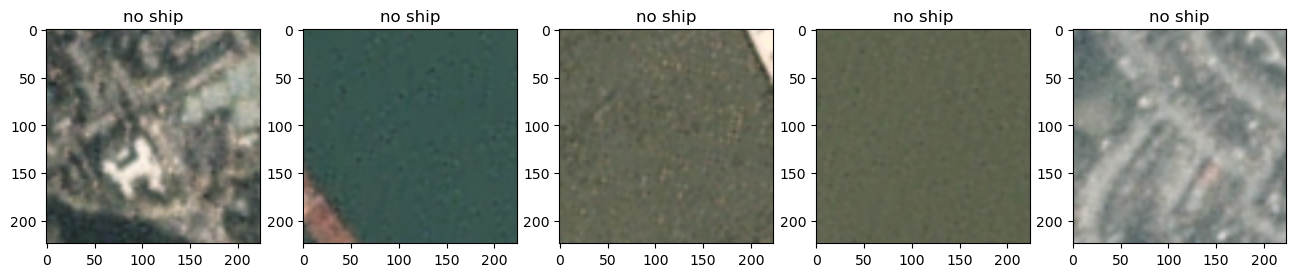

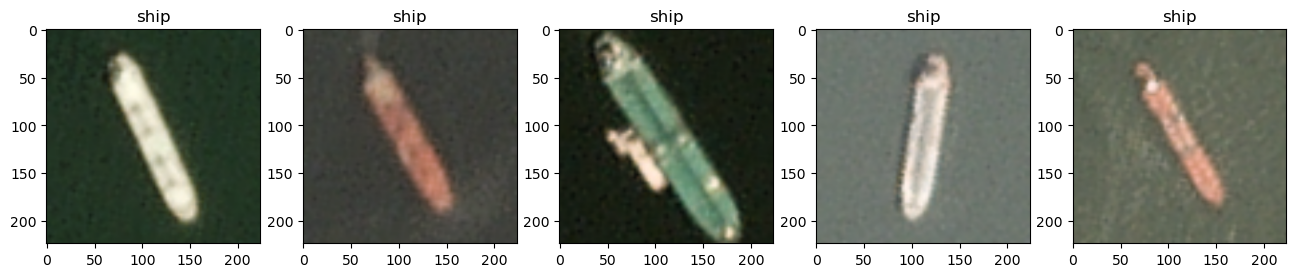

In [11]:
plot_random(no_ship, ship, num=5)

In [12]:
# Prepare labels
ship_labels = np.ones(len(ship))
no_ship_labels = np.zeros(len(no_ship))

In [13]:
# Concatenate data and labels
images = np.concatenate((no_ship, ship), axis=0)
labels = np.concatenate((no_ship_labels, ship_labels), axis=0)

In [14]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [15]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# Convert labels to categorical (for binary classification)
train_labels = tf.keras.utils.to_categorical(train_labels, 2)
test_labels = tf.keras.utils.to_categorical(test_labels, 2)


In [17]:
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Add, PReLU, UpSampling2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import layers, models

In [18]:
# Load the VGG19 model without the top layer
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers (so their weights are not updated during training)
for layer in vgg.layers:
    layer.trainable = False

# Add custom classification layers on top of VGG19
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization to prevent overfitting
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 output neurons for binary classification (ship vs. no_ship)

# Create the full model
model = Model(inputs=vgg.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.8119 - loss: 0.4306 - val_accuracy: 0.9656 - val_loss: 0.1167
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.9508 - loss: 0.1313 - val_accuracy: 0.9563 - val_loss: 0.0983
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.9737 - loss: 0.0843 - val_accuracy: 0.9594 - val_loss: 0.0923
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9781 - loss: 0.0677 - val_accuracy: 0.9703 - val_loss: 0.0811
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9812 - val_loss: 0.0609
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9797 - loss: 0.0615 - val_accuracy: 0.9797 - val_loss: 0.0566
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9812 - val_loss: 0.0531
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.9903 - loss: 0.0366 - val_accuracy: 0.9828 - v

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9686 - loss: 0.0911
Test Loss: 0.0881
Test Accuracy: 0.9712


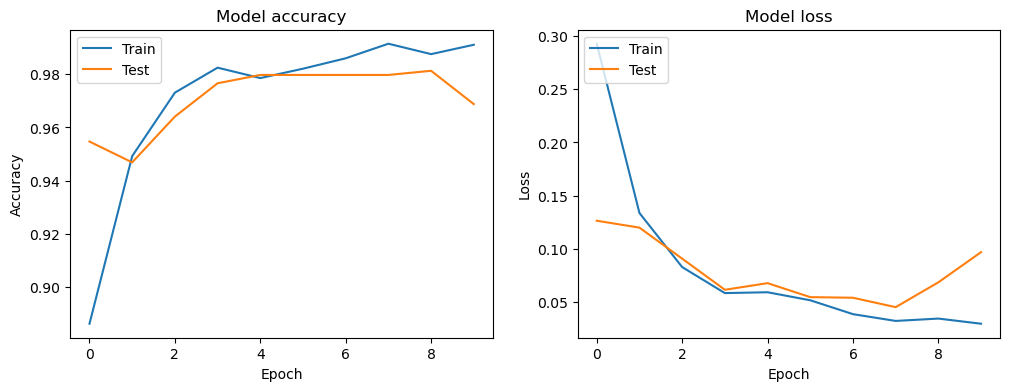

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [26]:
# Predict the labels on the test set
pred_labels = (model.predict(test_images) > 0.5).astype("int32")

25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step


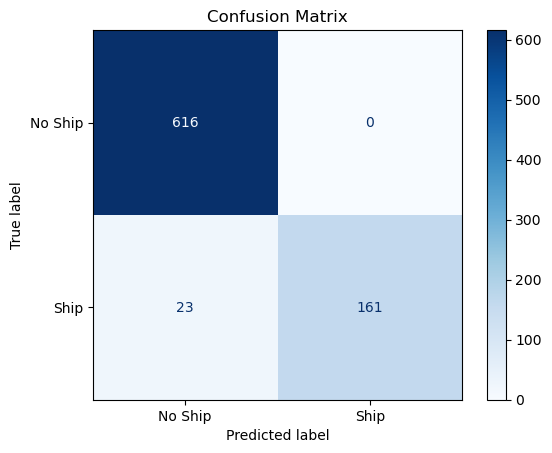

In [27]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Ship', 'Ship'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Generate and print classification report
class_report = classification_report(test_labels, pred_labels, target_names=['No Ship', 'Ship'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     No Ship       0.96      1.00      0.98       616
        Ship       1.00      0.88      0.93       184

   micro avg       0.97      0.97      0.97       800
   macro avg       0.98      0.94      0.96       800
weighted avg       0.97      0.97      0.97       800
 samples avg       0.97      0.97      0.97       800

